<a href="https://colab.research.google.com/github/BacLuc/try-jupyter/blob/submit-colab/Practical3_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 3: CIFAR-10

This is the second task of Practical 3. Your task is to use **transfer learning** to build a convolutional neural network to tackle the CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). 
You could select an existing trained model (VGG16 excluded) from Keras (https://keras.io/api/applications/) and fine-tune it to build a classifier for CIFAR-10.

We will grade your code based on the accuracy of your model. 
Your CNN should achieve at least an accuracy of 75% to pass the practical.
You can get 5 bonus points by achieving an accuracy of 85%+.


The model files might be too large to be uploaded to GitHub. 
Please use the following link to upload your models: https://seafile.ifi.uzh.ch/u/d/695f63e725b641ed8633/

Name the model file `{repository_name}-CIFAR10.h5`. For example, if your repository is FDS22-M0, you should name the model file `FDS22-M0-CIFAR10.h5`. If you are not satisfied with the model you have uploaded, you can upload a new one with the same name. We will only look at the newest model. Nevertheless, try to upload as few times as possible, since the online drive has a limited amount of space. 

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.9.2'

In [3]:
tf.keras.__version__

'2.9.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as apply the preprocess function of your selected model and perform data augmentation. 

170498071/170498071 [==============================] - 6s 0us/step


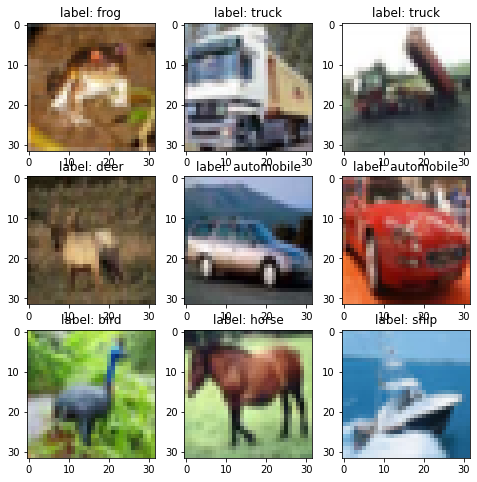

(50000, 32, 32, 3)

In [4]:
from keras.datasets import cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

_, axes = plt.subplots(3, 3, figsize=(8, 8))
for i in range(0,9):
    ax = axes[i//3, i%3]
    ax.set_title(f'label: {label_names[y_train_full[i][0]]}')
    ax.imshow(X_train_full[i])
plt.show()

X_train_full.shape

In [5]:
# one-hot encoding
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(y_train_full.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [6]:
# get a feeling for the data
print('one pixel looks like:')
print(X_train_full[0][0][0])

# assuming the pixel values go from 0 - 255

X_train_full = X_train_full/255.0
X_test = X_test/255.0

print('after preprocessing, one pixel looks like:')
print(X_train_full[0][0][0])


one pixel looks like:
[59 62 63]
after preprocessing, one pixel looks like:
[0.23137255 0.24313725 0.24705882]


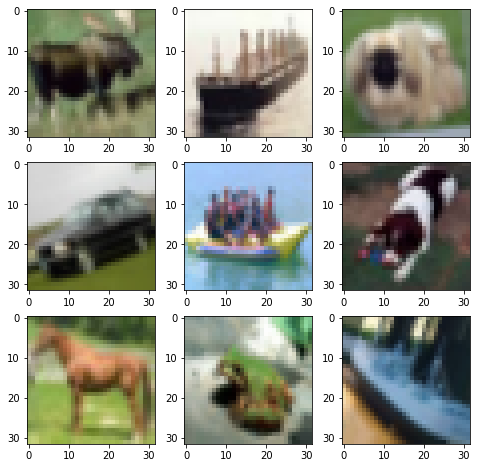

lenght of train generator is: 1407
lenght of valid generator is: 157
generating data from one image


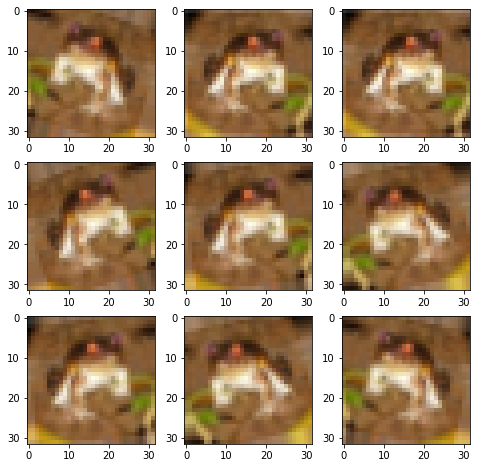

In [7]:
# augment data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20, 
                             horizontal_flip=True, 
                             #zoom_range=0.1,
                             validation_split=0.1,
                             )

# datagen.fit(X_train_full)

train_data_generator= datagen.flow(X_train_full, 
                                   y_train_full, 
                                   batch_size=32,
                                   subset='training'
                                   )

valid_data_generator= datagen.flow(X_train_full, 
                                   y_train_full, 
                                   batch_size=32,
                                   subset='validation'
                                   )

sample_images = [next(train_data_generator) for _ in range(0,9)]

_, axes = plt.subplots(3, 3, figsize=(8, 8))
for i in range(0,9):
    ax = axes[i//3, i%3]
    ax.imshow(sample_images[i][0][0])
plt.show()

print(f'lenght of train generator is: {len(train_data_generator)}')
print(f'lenght of valid generator is: {len(valid_data_generator)}')

print(f'generating data from one image')

change_one_image = datagen.flow(X_train_full[:1], y_train_full[:1], batch_size=9)

sample_images = [next(change_one_image) for _ in range(0,9)]

_, axes = plt.subplots(3, 3, figsize=(8, 8))
for i in range(0,9):
    ax = axes[i//3, i%3]
    ax.imshow(sample_images[i][0][0])
plt.show()

## Build and train the model

Build and train your model. 

image shape is: (128, 128, 3)


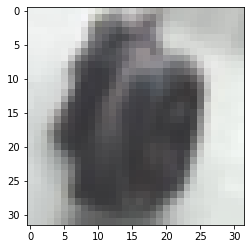

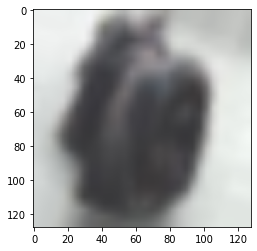

In [8]:
# get and preprocess first image, that we can calculate the input shape for the
# external model
#IMG_SIZE=75
#IMG_SIZE=32
# 64 pixels yielded 83% accuracy with the VGG19
IMG_SIZE=128
preprocess_layers = [
    tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE, input_shape=(None, None, 3))
]

preprocess = tf.keras.Sequential(preprocess_layers)

image_to_calc_shape = next(train_data_generator)
image_from_gen = image_to_calc_shape[0][0]
preprocessed_image = preprocess(image_from_gen)
image_shape = preprocessed_image.shape
print(f'image shape is: {image_shape}')
plt.imshow(image_from_gen)
plt.show()
plt.imshow(preprocessed_image)
plt.show()

In [9]:
# TODO: load the model you selected

external_model = tf.keras.applications.vgg19.VGG19(include_top=False, input_shape=image_shape, weights='imagenet')
# external_model = tf.keras.applications.inception_v3.InceptionV3(include_top=False, input_shape=image_shape, weights='imagenet')
external_model.summary()

80134624/80134624 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [10]:

vgg19_layers_to_take = 20
resnet50_layers_to_take = len(external_model.layers)

layers_to_take = vgg19_layers_to_take

layers_from_external_model = external_model.layers[:layers_to_take]

# 12 learned slower, but leveled at the same accuracy
vgg19_layers_to_freeze = 16
resnet50_layers_to_feeze = resnet50_layers_to_take

layers_to_freeze = vgg19_layers_to_freeze

for layer in layers_from_external_model[:layers_to_freeze]:
  print(f'won\'t train layer {type(layer)} with shape {layer.output.shape}')
  layer.trainable = False

print('-----')
print('')


def create_activation():
  return tf.keras.layers.ELU()

# for resnet, 0.3 was ok.
dropout_rate = 0.5

def additional_layers_for_vgg19():
  return [
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation=create_activation(), kernel_initializer='he_uniform', padding="same"),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation=create_activation(), kernel_initializer='he_uniform', padding="same"),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation=create_activation(), kernel_initializer='he_uniform', padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation=create_activation(), kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1024, activation=create_activation(), kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(512, activation=create_activation(), kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(256, activation=create_activation(), kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(128, activation=create_activation(), kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(64, activation=create_activation(), kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
  ]


def additional_layers_for_resnet():
  return [
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation=create_activation(), kernel_initializer='he_uniform', padding="same"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation=create_activation(), kernel_initializer='he_uniform', padding="same"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation=create_activation(), kernel_initializer='he_uniform', padding="same"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation=create_activation(), kernel_initializer='he_uniform', padding="same"),
    # tf.keras.layers.MaxPooling2D(pool_size=1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation=create_activation(), kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation=create_activation(), kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(256, activation=create_activation(), kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(128, activation=create_activation(), kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(64, activation=create_activation(), kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
  ]

additional_layers = additional_layers_for_vgg19()

layer_list = []
layer_list.extend(preprocess_layers)
layer_list.extend(layers_from_external_model)
# layer_list.extend([external_model])
layer_list.extend(additional_layers)

model = keras.models.Sequential(layer_list)

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

model.build(input_shape=X_train_full.shape[1:])
print(model.summary())

won't train layer <class 'keras.engine.input_layer.InputLayer'> with shape (None, 128, 128, 3)
won't train layer <class 'keras.layers.convolutional.conv2d.Conv2D'> with shape (None, 128, 128, 64)
won't train layer <class 'keras.layers.convolutional.conv2d.Conv2D'> with shape (None, 128, 128, 64)
won't train layer <class 'keras.layers.pooling.max_pooling2d.MaxPooling2D'> with shape (None, 64, 64, 64)
won't train layer <class 'keras.layers.convolutional.conv2d.Conv2D'> with shape (None, 64, 64, 128)
won't train layer <class 'keras.layers.convolutional.conv2d.Conv2D'> with shape (None, 64, 64, 128)
won't train layer <class 'keras.layers.pooling.max_pooling2d.MaxPooling2D'> with shape (None, 32, 32, 128)
won't train layer <class 'keras.layers.convolutional.conv2d.Conv2D'> with shape (None, 32, 32, 256)
won't train layer <class 'keras.layers.convolutional.conv2d.Conv2D'> with shape (None, 32, 32, 256)
won't train layer <class 'keras.layers.convolutional.conv2d.Conv2D'> with shape (None, 32,

In [11]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True
                                                  )
history = model.fit(train_data_generator,
                    #batch_size=60,
                    epochs=30,
                    validation_data=(valid_data_generator),
                    callbacks=[early_stopping_cb]
                    )

Epoch 1/30
1407/1407 [==============================] - 148s 96ms/step - loss: 1.7629 - accuracy: 0.3210 - val_loss: 1.7732 - val_accuracy: 0.3552
Epoch 2/30
1407/1407 [==============================] - 138s 98ms/step - loss: 1.2805 - accuracy: 0.5282 - val_loss: 1.3175 - val_accuracy: 0.5526
Epoch 3/30
1407/1407 [==============================] - 138s 98ms/step - loss: 1.0576 - accuracy: 0.6336 - val_loss: 0.9288 - val_accuracy: 0.6786
Epoch 4/30
1407/1407 [==============================] - 138s 98ms/step - loss: 0.9310 - accuracy: 0.6869 - val_loss: 0.8731 - val_accuracy: 0.7062
Epoch 5/30
1407/1407 [==============================] - 138s 98ms/step - loss: 0.8433 - accuracy: 0.7224 - val_loss: 0.8020 - val_accuracy: 0.7302
Epoch 6/30
1407/1407 [==============================] - 137s 98ms/step - loss: 0.7964 - accuracy: 0.7389 - val_loss: 0.7663 - val_accuracy: 0.7390
Epoch 7/30
1407/1407 [==============================] - 137s 98ms/step - loss: 0.7666 - accuracy: 0.7537 - val_loss: 0

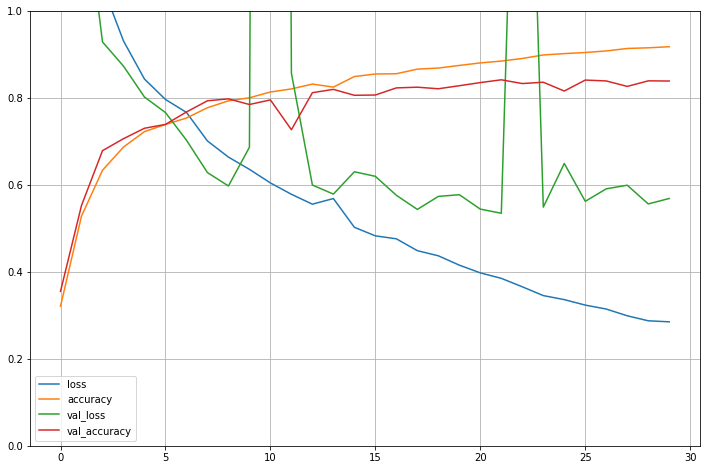

In [12]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

Save and upload your trained model to the **Seafile link** we provided to you. You can upload it multiple times. We will consider only the newest uploaded model. 

In [13]:
model_name = 'FDS22-M033-CIFAR10.h5'
model.save(model_name) # change the file name according to your repository name

## Load the model and evaluate it on the test data

In [14]:
model = keras.models.load_model(model_name)
model.evaluate(X_test, y_test)

313/313 [==============================] - 21s 67ms/step - loss: 0.5240 - accuracy: 0.8570


[0.5239975452423096, 0.8569999933242798]

313/313 [==============================] - 19s 62ms/step


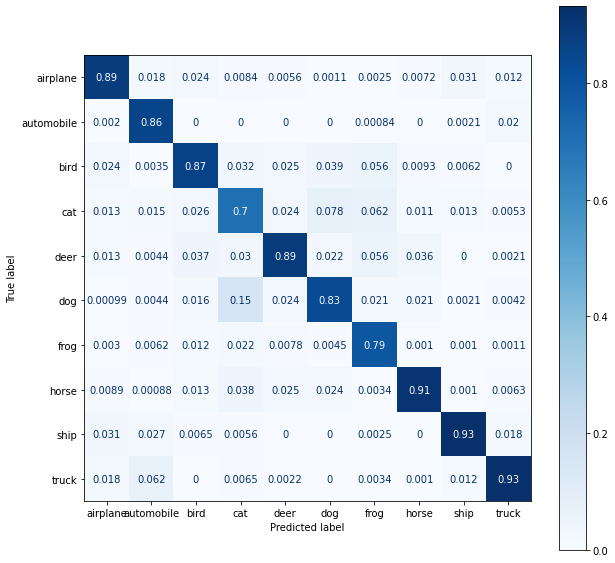

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_prediction = model.predict(X_test)
y_prediction = np.argmax (y_prediction, axis = 1)
y_test_labels=np.argmax(y_test, axis=1)

result = confusion_matrix(y_test_labels, y_prediction , normalize='pred')

disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=label_names)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()

In [21]:
#zip the model
!zip -r model.zip '{model_name}'

  adding: FDS22-M033-CIFAR10.h5 (deflated 9%)


In [23]:
!ls -lah model.zip

-rw-r--r-- 1 root root 389M Dec 21 19:51 model.zip


In [25]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
!cp model.zip '/content/gdrive/MyDrive/Colab Notebooks/practical3/{model_name}.zip'

Mounted at /content/gdrive


## Short report

Please write a few sentences explaining how you build and train the model. Please include the decisions you made, such as how you decide the number of layers reused from the selected model and the difficulties you met.